<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/03_CORRELA%C3%87%C3%83O_entre_D%C3%93LAR_e_IBOVESPA_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ricos pelo Acaso



Link para o vídeo: https://youtu.be/zjaGIcUb6Ek

# 1. Importando bibliotecas

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

# 2. Obtendo e tratando os dados

In [15]:
tickers = "^BVSP USDBRL=X"
carteira = yf.download(tickers, start="2007-01-01", end=datetime.datetime.today())["Close"]

[*********************100%***********************]  2 of 2 completed


In [16]:
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.132500,NaN
2007-01-02,2.131000,45383.000000
2007-01-03,2.134500,44445.000000
2007-01-04,2.139000,44020.000000
2007-01-05,2.147000,42245.000000
...,...,...
2022-12-29,5.266800,110031.000000
2022-12-30,5.284600,NaN
2023-01-02,5.285500,106376.000000


In [17]:
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.131000,45383.0
2007-01-03,2.134500,44445.0
2007-01-04,2.139000,44020.0
2007-01-05,2.147000,42245.0
2007-01-08,2.146500,42830.0
...,...,...
2022-12-27,5.217500,108347.0
2022-12-28,5.292300,110237.0
2022-12-29,5.266800,110031.0


In [18]:
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2007-01-02,2.131000,45383.0
2007-01-03,2.134500,44445.0
2007-01-04,2.139000,44020.0
2007-01-05,2.147000,42245.0
2007-01-08,2.146500,42830.0
...,...,...
2022-12-27,5.217500,108347.0
2022-12-28,5.292300,110237.0
2022-12-29,5.266800,110031.0


# 3. Resultados

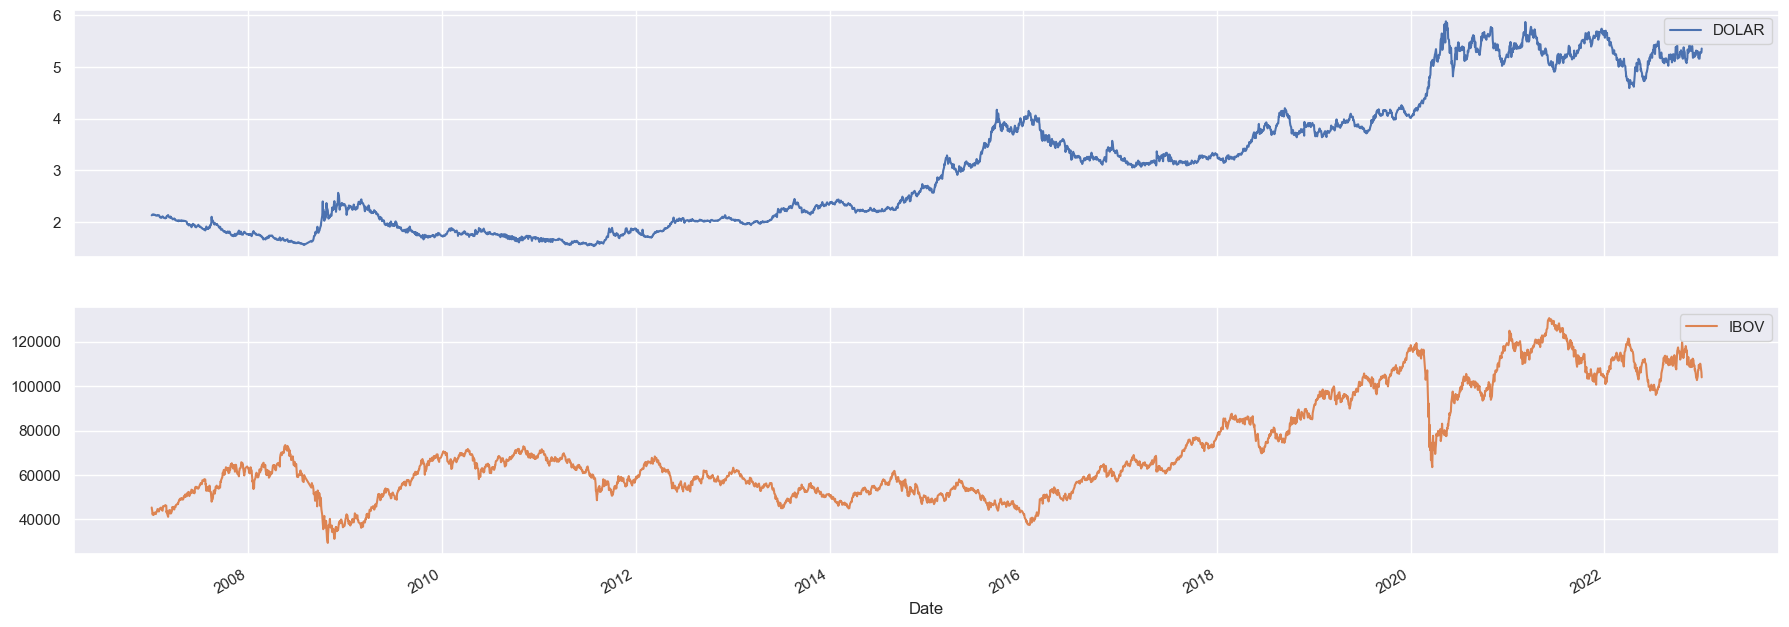

In [19]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

In [20]:
retornos = carteira.pct_change()[1:]
retornos

,DOLAR,IBOV
Date,,
2007-01-03,0.001642,-0.020669
2007-01-04,0.002108,-0.009562
2007-01-05,0.003740,-0.040323
2007-01-08,-0.000233,0.013848
2007-01-09,0.001165,-0.019216
...,...,...
2022-12-27,0.010302,-0.003596
2022-12-28,0.014336,0.017444
2022-12-29,-0.004818,-0.001869


In [21]:
retornos.describe()

,DOLAR,IBOV
count,3926.000000,3926.000000
mean,0.000308,0.000367
std,0.012124,0.017608
min,-0.104792,-0.147797
25%,-0.006178,-0.008415
50%,0.000129,0.000592
75%,0.006452,0.009609
max,0.101524,0.146560


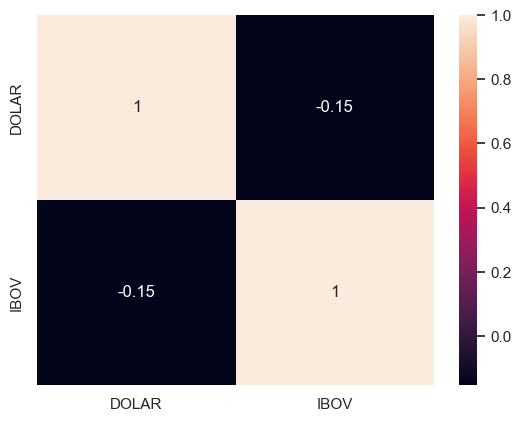

In [22]:
sns.heatmap(retornos.corr(), annot=True);

<AxesSubplot: xlabel='Date'>

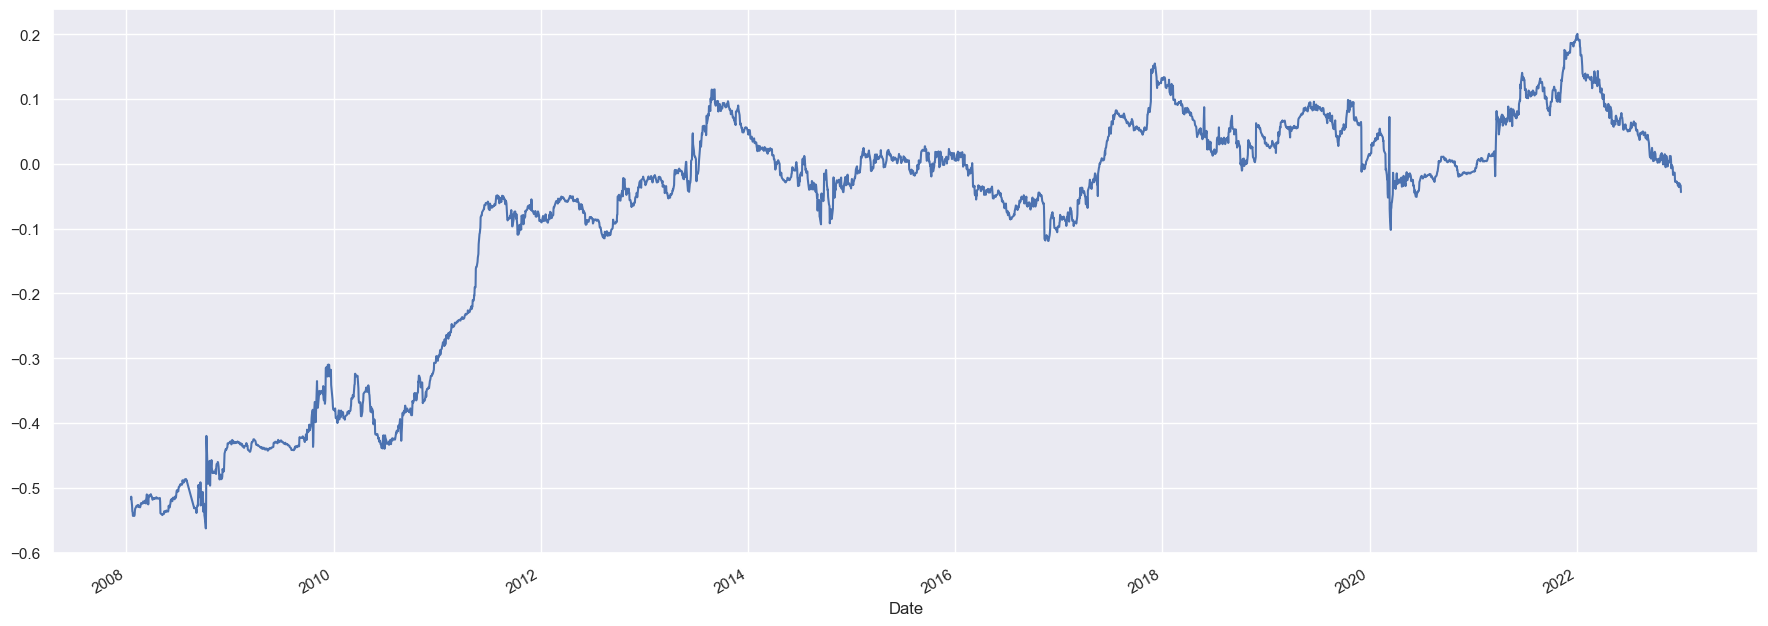

In [23]:
retornos["DOLAR"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8))

In [24]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

C:\Users\kiool\AppData\Local\Temp\ipykernel_13148\2937611271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])


,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.131000,45383.0,21296.573959
2007-01-03,2.134500,44445.0,20822.206345
2007-01-04,2.139000,44020.0,20579.710732
2007-01-05,2.147000,42245.0,19676.291819
2007-01-08,2.146500,42830.0,19953.411504
...,...,...,...
2022-12-27,5.217500,108347.0,20766.074872
2022-12-28,5.292300,110237.0,20829.695091
2022-12-29,5.266800,110031.0,20891.433419


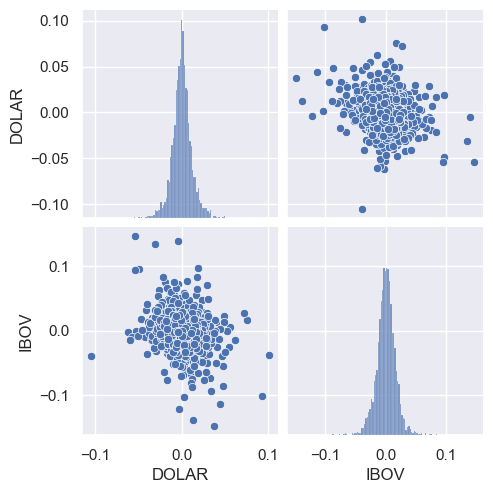

In [25]:
sns.pairplot(retornos);